# Electric Vehicle Charging Stations Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


In [3]:
data = pd.read_csv('Electric-vech.csv')

In [4]:
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [6]:
data['EV_Sales_Quantity'].fillna(data['EV_Sales_Quantity'].mean(), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

C:\Users\priyanshu\AppData\Local\Temp\ipykernel_18840\1520462337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['EV_Sales_Quantity'].fillna(data['EV_Sales_Quantity'].mean(), inplace=True)


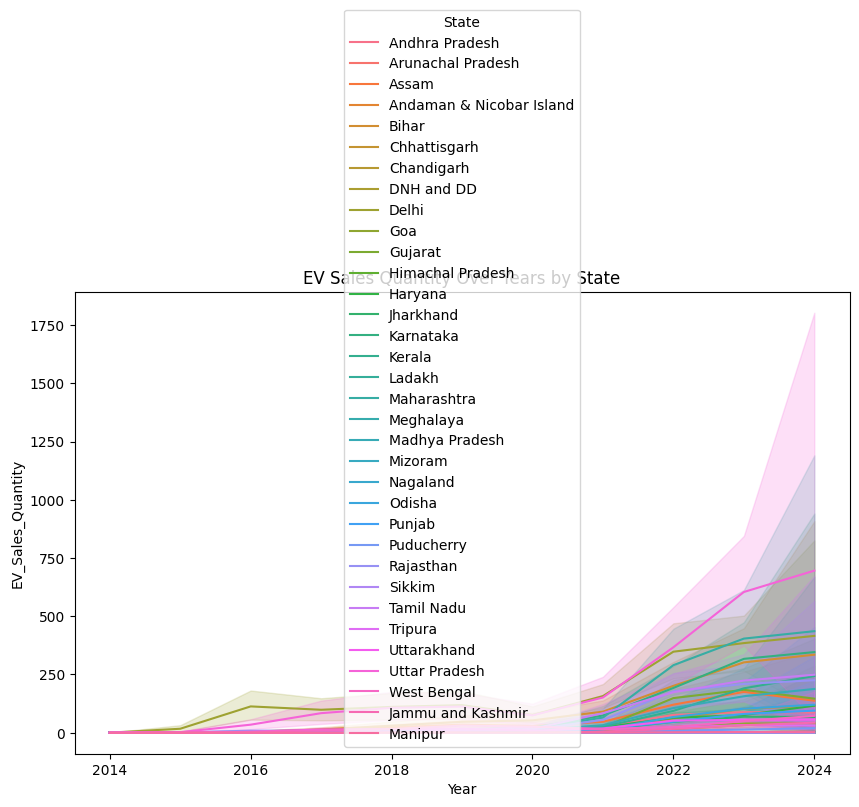

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Year', y='EV_Sales_Quantity', hue='State',markers='o')
plt.title('EV Sales Quantity Over Years by State')
plt.show()

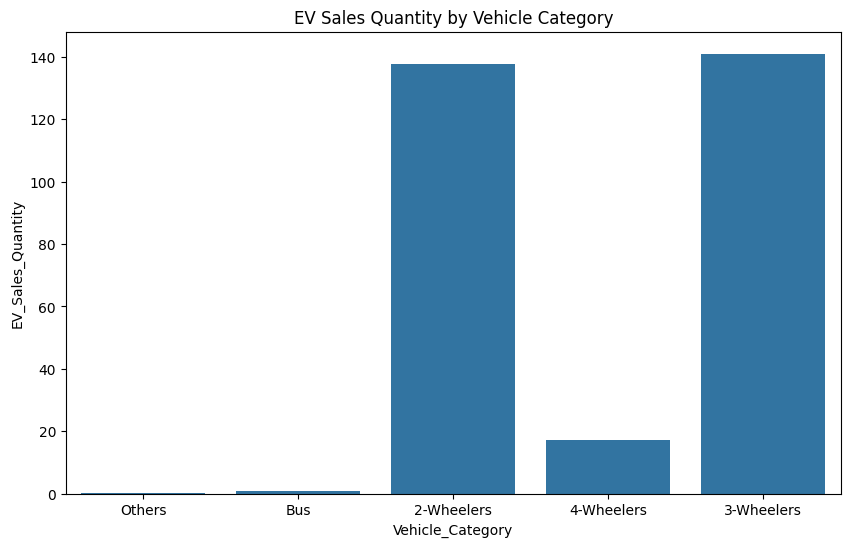

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=data, errorbar=None)
plt.title('EV Sales Quantity by Vehicle Category')
plt.show()

In [10]:
data['Date'] = pd.to_datetime(data['Date'])


In [13]:
data['Month'] = data['Date'].dt.month
data['data'] = data['Date'].dt.day

In [16]:
df_encoded = pd.get_dummies(data, columns=['State', 'Vehicle_Category'], drop_first=True)

In [17]:
df_encoded.drop(['Date'], axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [19]:
x = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
data['Month'] = data['Month'].astype(float)


In [26]:
x_train.isna().sum()



Year                           0
Month_Name                     0
Vehicle_Class                  0
Vehicle_Type                   0
Month                          0
data                           0
State_Andhra Pradesh           0
State_Arunachal Pradesh        0
State_Assam                    0
State_Bihar                    0
State_Chandigarh               0
State_Chhattisgarh             0
State_DNH and DD               0
State_Delhi                    0
State_Goa                      0
State_Gujarat                  0
State_Haryana                  0
State_Himachal Pradesh         0
State_Jammu and Kashmir        0
State_Jharkhand                0
State_Karnataka                0
State_Kerala                   0
State_Ladakh                   0
State_Madhya Pradesh           0
State_Maharashtra              0
State_Manipur                  0
State_Meghalaya                0
State_Mizoram                  0
State_Nagaland                 0
State_Odisha                   0
State_Pudu